# 2022-1 빅데이터와 인공지능 12주차 Reports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

import graphviz

import os
import warnings
warnings.filterwarnings('ignore')

## 12주차 1차시

### Question 1
1. K-NN 알고리즘의 하이퍼파라미터(k, 거리 종류, 가중치)를 변경하면서 예측성능(정분류율)을 확인하시오.
2. 시도한 하이퍼파라미터 중 가장 우수한 성능을 보인 하이퍼파라미터를 적용한 Code를 업로드하시오.

In [2]:
# Load datasets
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
# Create dataframes
df_X = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df_y = pd.DataFrame(data=iris_data.target, columns=['Species'])
df_iris = pd.concat([df_X, df_y], axis=1)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Feature Scaling - Normalization
iris_scaler = MinMaxScaler().fit(df_X)
iris_new = pd.DataFrame(iris_scaler.transform(df_X), columns=iris_data.feature_names)
iris_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [5]:
# Split train and test datasets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(df_iris, df_iris['Species']):
    iris_train = df_iris.loc[train_index]
    iris_test = df_iris.loc[test_index]
    X_train, y_train = iris_train.iloc[:, :4], iris_train['Species']
    X_test, y_test = iris_test.iloc[:, :4], iris_test['Species']

In [6]:
# Set hyperparameters for GridSerachCV
list_k = [i for i in range(1, 6)]
list_weights = ['uniform', 'distance']
list_metric = ['minkowski', 'manhattan', 'euclidean']

parameters = {
    'n_neighbors': list_k, 
    'weights': list_weights,
    'metric': list_metric
    }

In [7]:
# GridSearchCV
knn_iris = KNeighborsClassifier()
GridSearchCV_iris = GridSearchCV(knn_iris, parameters, cv=5, scoring='accuracy')
GridSearchCV_iris.fit(X_train, y_train)

df_iris_score = pd.DataFrame(data=GridSearchCV_iris.cv_results_)
df_iris_score = df_iris_score[['params', 'mean_test_score', 'std_test_score']]
df_iris_score

,params,mean_test_score,std_test_score
0,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.941667,0.020412
1,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.941667,0.020412
2,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.933333,0.020412
3,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.941667,0.020412
4,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.950000,0.016667
5,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.950000,0.016667
6,"{'metric': 'minkowski', 'n_neighbors': 4, 'wei...",0.933333,0.020412
7,"{'metric': 'minkowski', 'n_neighbors': 4, 'wei...",0.950000,0.016667
8,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.950000,0.031180
9,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.950000,0.031180


In [8]:
print(">>> Best Parameters: ", GridSearchCV_iris.best_params_)
print(">>> Best Score: ", GridSearchCV_iris.best_score_)
print(">>> Best Test Score: ", GridSearchCV_iris.score(X_test, y_test))

>>> Best Parameters:  {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
>>> Best Score:  0.95
>>> Best Test Score:  1.0


### Answer 1
* 이웃의 개수(k)를 3, 거리 측도를 'minkowski', 가중치를 'uniform'으로 설정한 경우, 정분류율이 가장 높은 경우의 성능은 0.955입니다.

### Question 2
* Boston 집값 예측을 위한 k-NN 알고리즘을 프로그래밍하고, Code를 업로드하세요.

In [9]:
# Load datasets
from sklearn.datasets import load_boston
data_boston = load_boston()
df_boston_X = pd.DataFrame(data=data_boston.data, columns=data_boston.feature_names)
df_boston_y = pd.DataFrame(data=data_boston.target, columns=['medv'])
df_boston = pd.concat([df_boston_X, df_boston_y], axis=1)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# Check outlion of datasets
print(">>> Keys : \n", load_boston().keys())
print(">>> Colunns : \n", load_boston().feature_names)
print(">>> Feature Shape: \n", data_boston.data.shape)
print(">>> Target Shape: \n", data_boston.target.shape)

>>> Keys : 
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
>>> Colunns : 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
>>> Feature Shape: 
 (506, 13)
>>> Target Shape: 
 (506,)


In [11]:
# Split datasets
X = df_boston.iloc[:, :-1]
y = df_boston.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(">>> X_train Shape: \n", X_train.shape)
print(">>> X_test Shape: \n", X_test.shape)
print(">>> y_train Shape: \n", y_train.shape)
print(">>> y_test Shape: \n", y_test.shape)

>>> X_train Shape: 
 (404, 13)
>>> X_test Shape: 
 (102, 13)
>>> y_train Shape: 
 (404,)
>>> y_test Shape: 
 (102,)


In [12]:
# Regression
knn_reg = KNeighborsRegressor(n_neighbors=1, weights='uniform', metric='minkowski')
knn_reg.fit(X_train, y_train)
boston_pred = knn_reg.predict(X_test)
print(">>> Accuracy score : ", knn_reg.score(X_test, y_test))

>>> Accuracy score :  0.2736759779026331


## 12주차 2차시
### Question 3
* 학습자료로 제공된 "Multiple_regression.csv" 데이터에 대한 선형회귀모형 Code를 업로드하세요.

In [13]:
path_data_muliple_reg = os.getcwd() + '/datasets/Multiple_regression.csv'
data_muliple_reg = pd.read_csv(path_data_muliple_reg)
data_muliple_reg.head()

,X1,X2,Y
0,9,8,91
1,7,5,72
2,5,3,65
3,6,4,69
4,11,9,89


In [14]:
# Split datasets
X = data_muliple_reg.iloc[:, :2]
y = data_muliple_reg.iloc[:, 2]
Scaler_Multiple = MinMaxScaler().fit(X)
X = Scaler_Multiple.transform(X)

In [15]:
# Linear Regression - fit
Multi_LM = LinearRegression()
Multi_LM.fit(X, y)

LinearRegression()

In [16]:
# Linear Regression - predict
Multi_LM.predict(X)
print(">>> R2 Square score: ", Multi_LM.score(X, y))
print(">>> 회귀 계수 = ", Multi_LM.coef_)
print(">>> 절편 = ", Multi_LM.intercept_)

>>> R2 Square score:  0.8340638883908116
>>> 회귀 계수 =  [11.43696733 28.75710227]
>>> 절편 =  61.53870738636364


## 12주차 3차시
### Question 4
1. 의사결정나무의 하이퍼파라미터들을 변경하면서 분류 모형과 예측모형의 성능 변화를 확인하시오.
2. 실습한 Code를 업로드하세요

In [17]:
# Load datasets
path_data_airquality = os.getcwd() + '/datasets/airquality.csv'
data_airquality = pd.read_csv(path_data_airquality)
data_airquality.drop(['Unnamed: 0'], axis=1, inplace=True)
data_airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [18]:
# Check whether dataset contains Null or NaN
data_airquality.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [19]:
# Split feautre and target datasets
data_airquality.dropna(axis=0, inplace=True)
X = data_airquality.iloc[:, 1:4]
y = data_airquality['Ozone']

In [20]:
# Decision Tree Regression Example
airquality_scaler = MinMaxScaler()
tree_reg = DecisionTreeRegressor(max_depth=5)
Full_Pipeline_Tree_Reg = Pipeline(steps=[('scaler', airquality_scaler), ('Regressor', tree_reg)])
Full_Pipeline_Tree_Reg.fit(X, y)
airquality_pred = Full_Pipeline_Tree_Reg.predict(X)
print(">>> R_Squared = ", Full_Pipeline_Tree_Reg.score(X, y))

>>> R_Squared =  0.9274460561816492


In [21]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# GridSearchCV
parameters = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],\
            'splitter':['best', 'random'],\
            'max_depth':[2, 3, 5, 10],\
            'min_samples_split':[2, 3, 5]}

grid_dreg = GridSearchCV(tree_reg, param_grid=parameters, scoring='r2', cv=5)
grid_dreg.fit(X_train, y_train)

df_scores = pd.DataFrame(grid_dreg.cv_results_)
df_scores = df_scores[['params', 'mean_test_score', 'std_test_score']]
df_scores

,params,mean_test_score,std_test_score
0,"{'criterion': 'squared_error', 'max_depth': 2,...",0.499683,0.174800
1,"{'criterion': 'squared_error', 'max_depth': 2,...",0.554388,0.198855
2,"{'criterion': 'squared_error', 'max_depth': 2,...",0.499683,0.174800
3,"{'criterion': 'squared_error', 'max_depth': 2,...",0.487257,0.229096
4,"{'criterion': 'squared_error', 'max_depth': 2,...",0.499683,0.174800
...,...,...,...
91,"{'criterion': 'poisson', 'max_depth': 10, 'min...",0.575635,0.171646
92,"{'criterion': 'poisson', 'max_depth': 10, 'min...",0.633132,0.149771
93,"{'criterion': 'poisson', 'max_depth': 10, 'min...",0.421055,0.140857
94,"{'criterion': 'poisson', 'max_depth': 10, 'min...",0.660546,0.140653


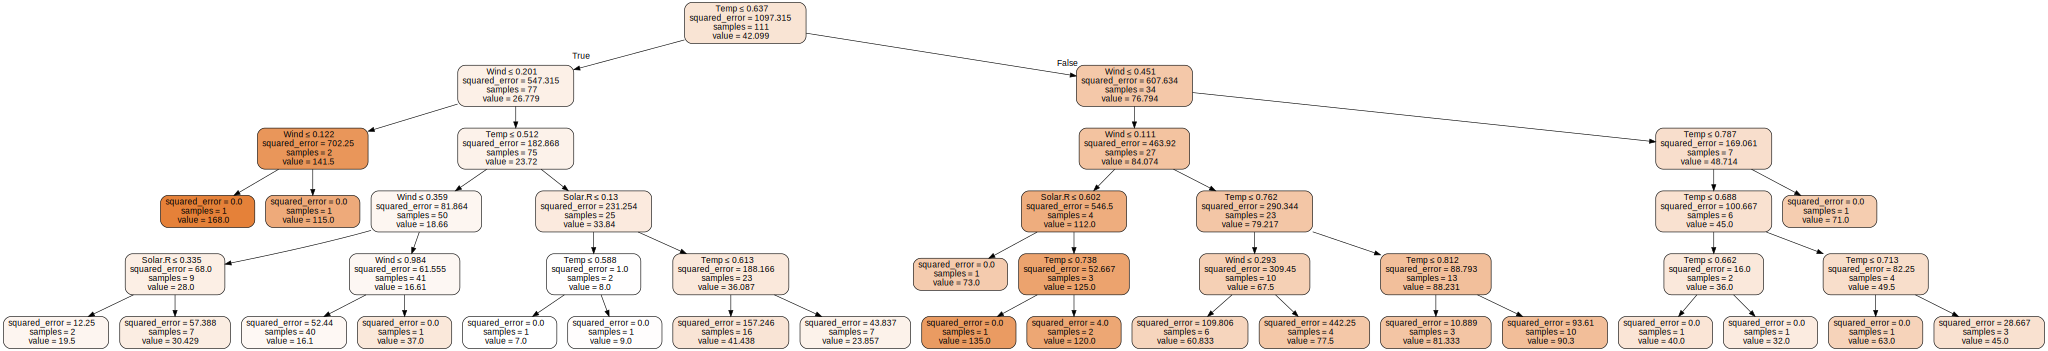

In [23]:
# Decision Tree Visualization
dot_data_2 = tree.export_graphviz(tree_reg, out_file=None, \
    feature_names=X.columns, class_names='Ozone', \
    filled=True, rounded=True, special_characters=True)

graph_2 = graphviz.Source(dot_data_2)
graph_2